# Systematics Check

The purpose here is to check, for one mineral whether having a greater about of flexibility in the background will produce a dramatic decrease in the sensitivity

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz, quad
from scipy.special import erf
from paleo.paleopy_classes import *
import paleo.paleopy as paleopy

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
#mpl.rcParams.update({'font.size': 16,'font.family':'serif'})

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

#%matplotlib inline

In [2]:
Sinj = Mineral("Sinjarite")

In [3]:
dRdx_BG = paleopy.GetBackground(Sinj, 15)

 DMutils.py: Loading neutrino flux for the first time...
Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [4]:
# print(np.shape(dRdx_BG),dRdx_BG)
dRdx_BG = np.array(dRdx_BG)
# newdRdx_BG = np.zeros([dRdx_BG[0:11,:].size+2,dRdx_BG[0,:].size])
newdRdx_BG = np.zeros([dRdx_BG.size,dRdx_BG[0,:].size])
print(dRdx_BG.shape,newdRdx_BG.shape)
x = 0
for i in range(0,dRdx_BG[:,0].size):
    for j in range(0,dRdx_BG[0,:].size):
        newdRdx_BG[x+j,j] = dRdx_BG[i,j] + 1e-30
    x += dRdx_BG[0,:].size
    
# newdRdx_BG[x:,:] = dRdx_BG[11:,:] + 1e-30

#     print(x+j)
print(newdRdx_BG.shape)

(13, 69) (897, 69)
(897, 69)


lets now make many different background components...

In [5]:
ref_sig = 1e-45
mlist_best = np.logspace(-0.5,4,num=100)
systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-2, 1e-2]
SF = sf.Swordfish(list(dRdx_BG), T=systematics, E=np.ones_like(dRdx_BG[0])*100)

limit_list_best = np.zeros_like(mlist_best)
# DR_list_best = np.zeros_like(mlist)

for i, m in enumerate(mlist_best):
    sig = paleopy.GetSignal(Sinj, 15.0, m_DM=m, xsec=ref_sig)
    UL = SF.upperlimit(sig, 0.1)
#     DR = SF.discoveryreach(sig, 2.87e-7)
    limit_list_best[i] = ref_sig * UL
#     DR_list_best[i] = ref_sig * DR

# np.savetxt('../ES/limits/lims_' + mineral.shortname +  '_exp' + str(exposure) + '_res' + str(sigma) + '.txt', list(zip(mlist, limit_list, DR_list)),
#             header="Mineral: " + mineral.name + "; Exposure [kg Myr]: " + str(exposure) + "; sigma [nm]:" + str(sigma) + "\nColumns: m [GeV], 95% upper limit [cm^2], 5-sig discovery reach [cm^2]")

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
 

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


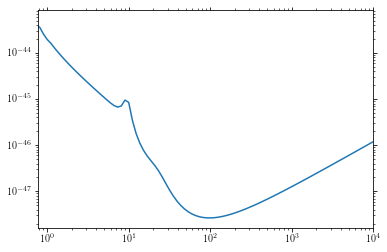

In [6]:
plt.loglog(mlist_best,limit_list_best)
plt.xlim(np.log10(6),10000)
plt.show()

In [7]:
new_systematics10 = np.ones(np.shape(newdRdx_BG)[0])
new_systematics1 = np.ones(np.shape(newdRdx_BG)[0])
new_systematics1[-(2*dRdx_BG[0,:].size):] *= 1e-2
new_systematics10[-(2*dRdx_BG[0,:].size):] *= 1e-1
# print(new_systematics)
new_systematics10 = list(new_systematics10)
new_systematics1 = list(new_systematics1)

In [8]:
newdRdx_BG = list(newdRdx_BG)
# print(new_systematics, newdRdx_BG)
SF_1 = sf.Swordfish(newdRdx_BG, T=new_systematics1, E=np.ones_like(newdRdx_BG[0])*100)
SF_10 = sf.Swordfish(newdRdx_BG, T=new_systematics10, E=np.ones_like(newdRdx_BG[0])*100)
ref_sig = 1e-45
mlist = np.logspace(-0.5,4,num=100)

limit_list_10 = np.zeros_like(mlist)
limit_list_1 = np.zeros_like(mlist)

for i, m in enumerate(mlist):
    sig = paleopy.GetSignal(Sinj, 15.0, m_DM=m, xsec=ref_sig)
    UL_10 = SF_10.upperlimit(sig, 0.1)
    UL_1 = SF_1.upperlimit(sig, 0.1)
#     DR = SF.discoveryreach(sig, 2.87e-7)
    limit_list_10[i] = ref_sig * UL_10
    limit_list_1[i] = ref_sig * UL_1

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
 

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


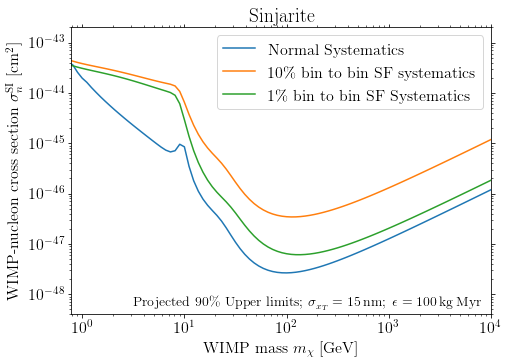

In [21]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
plt.figure(figsize=(7,5))
plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')
plt.xlim(np.log10(6),10000)
plt.ylim(4e-49,2e-43)
plt.tight_layout(pad=0.3)
plt.loglog(mlist,limit_list_best, label='Normal Systematics')
plt.loglog(mlist,limit_list_10, label='10\% bin to bin SF systematics')
plt.loglog(mlist,limit_list_1, label='1\% bin to bin SF Systematics')
plt.legend()
plt.tight_layout(pad=0.3)
plt.title(r'Sinjarite')
plt.text(8e3, 5.e-49, r'Projected $90\%$ Upper limits; $\sigma_{x_T} = 15\,\mathrm{nm}; \,\,\epsilon = 100 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=14, ha='right')
plt.tight_layout(pad=0.3)
plt.savefig("../plots/Systematics_check_15nmSFfree.pdf")
plt.show()

In [10]:
np.savetxt('../ES/limits/lims_Sinj_exp100.0_res15.0_SysCheck.txt',
            list(zip(mlist, limit_list_best, limit_list_10,limit_list_1)),
            header="Mineral: Sinjarite; Exposure [kg Myr]: 100.0; sigma [nm]:15.0 \nColumns: m [GeV], 90% upper limit  [cm^2] (Normal Systematics), 90% upper limit [cm^2] (10% bin to bin sys), 90% upper limit [cm^2](1% bin to bin sys)")



# 1nm case now

In [11]:
# xb = paleopy.calcBins_1nm()
N_BG_1nm = paleopy.GetBackground(Sinj, sigma=1.0)

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [12]:
N_BG_1nm = np.array(N_BG_1nm)
N_BG_1nm_sysfree = np.zeros([N_BG_1nm.size,N_BG_1nm[0,:].size])
print(N_BG_1nm.shape,N_BG_1nm_sysfree.shape)

x = 0
for i in range(0,N_BG_1nm[:,0].size):
    for j in range(0,N_BG_1nm[0,:].size):
        N_BG_1nm_sysfree[x+j,j] = N_BG_1nm[i,j] + 1e-30
    x += N_BG_1nm[0,:].size

print(N_BG_1nm_sysfree.shape)

(13, 69) (897, 69)
(897, 69)


In [13]:
ref_sig = 1e-45
mlist1nm_best = np.logspace(-0.5,4,num=100)
systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-2, 1e-2]
SF1nm = sf.Swordfish(list(N_BG_1nm), T=systematics, E=np.ones_like(N_BG_1nm[0]))

limit1nm_list_best = np.zeros_like(mlist1nm_best)
# DR_list_best = np.zeros_like(mlist)

for i, m in enumerate(mlist1nm_best):
#     sig = paleopy.GetSignal(Sinj, sigma=1.0, m_DM=m, xsec=ref_sig, x_bins=xb)
    sig = paleopy.GetSignal(Sinj, 1.0, m_DM=m, xsec=ref_sig)
    UL = SF1nm.upperlimit(sig, 0.1)
    limit1nm_list_best[i] = ref_sig * UL

# np.savetxt('../ES/limits/lims_' + mineral.shortname +  '_exp' + str(exposure) + '_res' + str(sigma) + '.txt', list(zip(mlist, limit_list, DR_list)),
#             header="Mineral: " + mineral.name + "; Exposure [kg Myr]: " + str(exposure) + "; sigma [nm]:" + str(sigma) + "\nColumns: m [GeV], 95% upper limit [cm^2], 5-sig discovery reach [cm^2]")

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


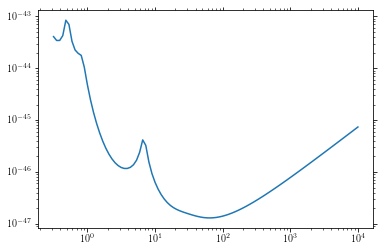

In [14]:
plt.loglog(mlist1nm_best,limit1nm_list_best)
plt.show()

In [15]:
new1nm_systematics10 = np.ones(np.shape(N_BG_1nm_sysfree)[0])
new1nm_systematics1 = np.ones(np.shape(N_BG_1nm_sysfree)[0])
new1nm_systematics1[-(2*N_BG_1nm[0,:].size):] *= 1e-2
new1nm_systematics10[-(2*N_BG_1nm[0,:].size):] *= 1e-1
# print(new_systematics)
new1nm_systematics10 = list(new1nm_systematics10)
new1nm_systematics1 = list(new1nm_systematics1)

In [16]:
N_BG_1nm_sysfree = list(N_BG_1nm_sysfree)
# print(new_systematics, newdRdx_BG)
SF1nm_1 = sf.Swordfish(N_BG_1nm_sysfree, T=new1nm_systematics1, E=np.ones_like(N_BG_1nm_sysfree[0]))
SF1nm_10 = sf.Swordfish(N_BG_1nm_sysfree, T=new1nm_systematics10, E=np.ones_like(N_BG_1nm_sysfree[0]))
ref_sig = 1e-45
mlist = np.logspace(-0.5,4,num=100)

limit1nm_list_10 = np.zeros_like(mlist)
limit1nm_list_1 = np.zeros_like(mlist)

for i, m in enumerate(mlist):
#     sig = paleopy.GetSignal(Sinj, sigma=1.0, m_DM=m, xsec=ref_sig, x_bins=xb)
    sig = paleopy.GetSignal(Sinj, 1.0, m_DM=m, xsec=ref_sig)
    UL_10 = SF1nm_10.upperlimit(sig, 0.1)
    UL_1 = SF1nm_1.upperlimit(sig, 0.1)
    limit1nm_list_10[i] = ref_sig * UL_10
    limit1nm_list_1[i] = ref_sig * UL_1

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


# REMEMBER TO SAVE THE LINES ---  TAKES AGES LIKE 12 HOURS!!!

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


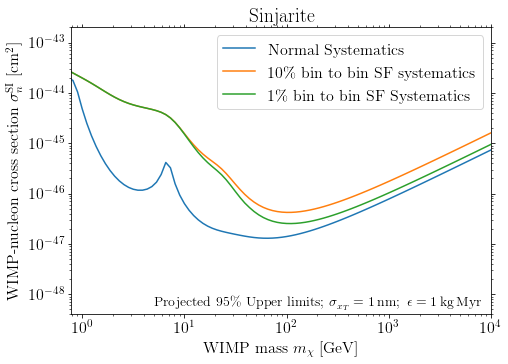

In [22]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
plt.figure(figsize=(7,5))
plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')
plt.xlim(np.log10(6),10000)
plt.ylim(4e-49,2e-43)
plt.tight_layout(pad=0.3)
plt.loglog(mlist,limit1nm_list_best, label='Normal Systematics')
plt.loglog(mlist,limit1nm_list_10, label='10\% bin to bin SF systematics')
plt.loglog(mlist,limit1nm_list_1, label='1\% bin to bin SF Systematics')
plt.legend()
plt.tight_layout(pad=0.3)
plt.title(r'Sinjarite')
plt.text(8e3, 5.e-49, r'Projected $95\%$ Upper limits; $\sigma_{x_T} = 1\,\mathrm{nm}; \,\,\epsilon = 1 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=14, ha='right')
plt.tight_layout(pad=0.3)
plt.savefig("../plots/Systematics_check_1nmSFfree.pdf")
plt.show()

In [18]:
np.savetxt('../ES/limits/lims_Sinj_exp1.0_res1.0_SysCheck.txt',
            list(zip(mlist, limit1nm_list_best, limit1nm_list_10,limit1nm_list_1)),
            header="Mineral: Sinjarite; Exposure [kg Myr]: 1.0; sigma [nm]:1.0 \nColumns: m [GeV], 95% upper limit  [cm^2] (Normal Systematics), 95% upper limit [cm^2] (10% bin to bin sys), 95% upper limit [cm^2](1% bin to bin sys)")



# Final plot

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


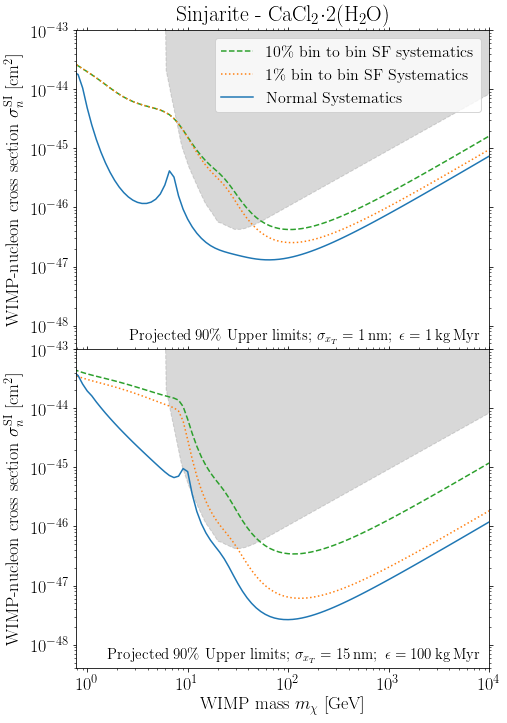

In [124]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)
plt.figure(figsize=(7,10))

grid = plt.GridSpec(2, 1, wspace=0.0, hspace=0.00)
ax1 = plt.subplot(grid[0, :])
ax2 = plt.subplot(grid[1:,:])

#Top panel
ax1.get_xaxis().tick_top()
ax1.tick_params(labeltop=False)

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.loglog(mlist,limit1nm_list_10, linestyle='--', color='C2' ,label='10\% bin to bin SF systematics')
ax1.loglog(mlist,limit1nm_list_1, linestyle=':', color='C1' ,label='1\% bin to bin SF Systematics')
ax1.loglog(mlist,limit1nm_list_best,  color='C0' ,label='Normal Systematics')
m_curr, sig_curr = np.loadtxt("../Data/CurrentLimits.txt", unpack=True)
ax1.fill_between(m_curr, sig_curr, 1e-35, linestyle='--', color='grey', alpha=0.3)
ax1.text(8e3, 5.e-49, r'Projected $90\%$ Upper limits; $\sigma_{x_T} = 1\,\mathrm{nm}; \,\,\epsilon = 1 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=15, ha='right')

ax1.legend(fontsize=16)
ax1.set_ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')
ax1.set_ylim(4e-49,1e-43)
ax1.set_xlim(np.log10(6),10000)



#Bottom panel
ax2.loglog(mlist,limit_list_10, linestyle='--' ,color='C2' ,label='10\% bin to bin SF systematics')
ax2.loglog(mlist,limit_list_1, linestyle=':',color='C1' , label='1\% bin to bin SF Systematics')
ax2.loglog(mlist,limit_list_best, color='C0' ,label='Normal Systematics')
ax2.fill_between(m_curr, sig_curr, 1e-35, linestyle='--', color='grey', alpha=0.3, label=r'Current limits')
ax2.text(8e3, 5.e-49, r'Projected $90\%$ Upper limits; $\sigma_{x_T} = 15\,\mathrm{nm}; \,\,\epsilon = 100 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=15, ha='right')

ax2.set_ylim(4e-49,1e-43)
ax2.set_xlim(np.log10(6),10000)

ax2.set_xlabel(r'WIMP mass $m_\chi$ [GeV]')
ax2.set_ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')


ax1.set_title(r'Sinjarite - $\mathrm{CaCl_2}$$\cdot$2($\mathrm{H_2O}$)')
plt.tight_layout(pad=0.3)
plt.savefig("../plots/Systematics_check_SFfree.pdf")

# Now lets make a signal to background plot

In [84]:
ref_sig = 1e-45
mlist_best = np.logspace(-0.5,4,num=100)
systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-2, 1e-2]
SF = sf.Swordfish(list(dRdx_BG), T=systematics, E=np.ones_like(dRdx_BG[0])*100)

# limit_list_best = np.zeros_like(mlist_best)
StoB = np.zeros_like(mlist_best)
StoB_effective = np.zeros_like(mlist_best)

for i, m in enumerate(mlist_best):
    sig = paleopy.GetSignal(Sinj, 15.0, m_DM=m, xsec=ref_sig)
    UL = SF.upperlimit(sig, 0.1)
    sigLim = paleopy.GetSignal(Sinj, 15.0, m_DM=m, xsec=ref_sig * UL)
    seff, beff = SF.equivalentcounts(sigLim)
    StoB[i] = np.max(sigLim/dRdx_BG.sum(axis=0))
    StoB_effective[i] =seff/beff

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
 

In [85]:
ref_sig = 1e-45
mlist1nm_best = np.logspace(-0.5,4,num=100)
systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-2, 1e-2]
SF1nm = sf.Swordfish(list(N_BG_1nm), T=systematics, E=np.ones_like(N_BG_1nm[0]))

# limit1nm_list_best = np.zeros_like(mlist1nm_best)
StoB1nm = np.zeros_like(mlist1nm_best)
StoB_effective1nm = np.zeros_like(mlist1nm_best)

for i, m in enumerate(mlist1nm_best):
    sig = paleopy.GetSignal(Sinj, 1.0, m_DM=m, xsec=ref_sig)
    UL = SF1nm.upperlimit(sig, 0.1)
    sigLim = paleopy.GetSignal(Sinj, 1.0, m_DM=m, xsec=ref_sig * UL)
    seff, beff = SF1nm.equivalentcounts(sigLim)
    StoB1nm[i] = np.max(sigLim/N_BG_1nm.sum(axis=0))
    StoB_effective1nm[i] =seff/beff

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


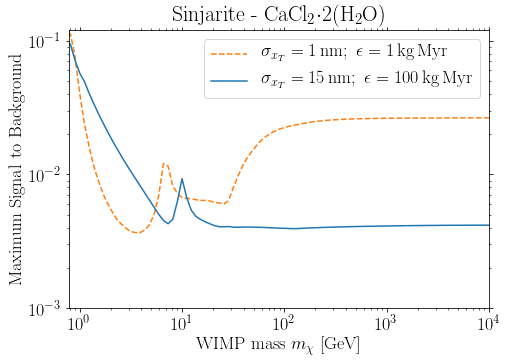

In [123]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)
plt.figure(figsize=(7,5))

plt.loglog(mlist1nm_best, StoB1nm, linestyle='--', color='C1' ,label=r'$\sigma_{x_T} = 1\,\mathrm{nm}; \,\,\epsilon = 1 \,\mathrm{kg}\,\mathrm{Myr}$')
plt.loglog(mlist_best, StoB, color='C0', label=r'$\sigma_{x_T} = 15\,\mathrm{nm}; \,\,\epsilon = 100 \,\mathrm{kg}\,\mathrm{Myr}$')
# plt.semilogx(mlist_best, StoB_effective, label=r'Equivalent signal to background - 15nm')
# plt.semilogx(mlist1nm_best, StoB_effective1nm, label=r'Equivalent signal to background - 1nm')
plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'Maximum Signal to Background')
plt.legend()
plt.xlim(np.log10(6),10000)
plt.ylim(1e-3,0.12)
# plt.text(70, 0.1, r'Maximum Signal to Background', fontsize=14, ha='right')

plt.title(r'Sinjarite - $\mathrm{CaCl_2}$$\cdot$2($\mathrm{H_2O}$)')
plt.tight_layout(pad=0.3)
plt.savefig("../plots/Sinj_StoB.pdf")

In [95]:
print(dRdx_BG[1,:].sum())

21.262665874304293
